In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#Drop duplicates of city names
city_df = city_df.drop_duplicates("city", keep = "first")
ride_df = ride_df.drop_duplicates("city", keep = "first")

# Combine the data into a single dataset
merged_df = ride_df.merge(city_df, on="city")

# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

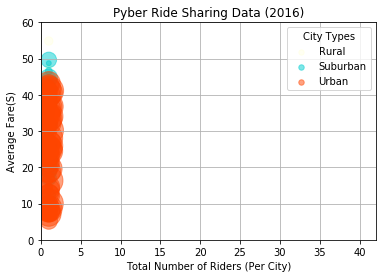

In [127]:
#creating Data Frame
avg_fare = merged_df.groupby(["city"])["fare"].mean()
total_rides = ride_df.groupby(["city"]).count()["ride_id"]
total_drivers = merged_df.groupby(["city"])["driver_count"].sum()
city_types = city_df.set_index(["city"])["type"]

new_df = pd.DataFrame ({"Count of Rides": total_rides, "Average Fare": avg_fare,
"Count of Drivers": total_drivers, "City Types": city_types})

#sorting the data frame
new_df.sort_values("Count of Drivers", ascending = False)

#devideing the data fram base on city types
r_df = new_df[new_df["City Types"] == "Rural"]
s_df = new_df[new_df["City Types"] == "Suburban"]
u_df = new_df[new_df["City Types"] == "Urban"]

# Obtain the x and y coordinates for each of the three city types
plt.scatter(r_df["Count of Rides"], r_df["Average Fare"], s = r_df["Count of Drivers"]*12, 
color="yellow", label="Rural", alpha=0.05)
            
plt.scatter(s_df["Count of Rides"], s_df["Average Fare"], s = s_df["Count of Drivers"]*12, 
color="darkturquoise", label="Suburban", alpha=0.5)
            
plt.scatter(u_df["Count of Rides"], u_df["Average Fare"], s = u_df["Count of Drivers"]*12, 
color="orangered", label="Urban", alpha=0.5) 

# Incorporate the other graph properties
plt.grid()
plt.xlim(0, 42)
plt.ylim(0, 60)

# Create a legend
lgnd = plt.legend(title="City Types", loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare(S)")

# Save Figure
plt.savefig("../Images/Ride.png")

In [81]:
# Show plot
plt.show()

## Total Fares by City Type

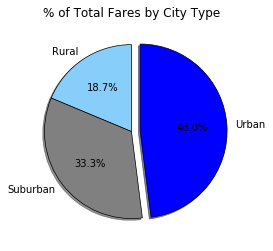

In [125]:
# Calculate Type Percents
type_group = merged_df.groupby('type')["type", "fare", "ride_id", "driver_count"]
total_fare = type_group.sum()['fare']

# Build Pie Chart
colors = ["lightskyblue", "gray", "blue"]
explode = [0, 0, 0.1]

plt.pie(total_fare, startangle = 90, colors = colors, explode = explode, labels = total_fare.index, 
autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": 0.7, "edgecolor": "black"})

plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/Ride1.png")

In [89]:
# Show Figure
plt.show()

## Total Rides by City Type

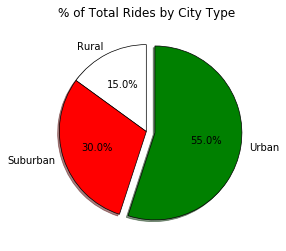

In [124]:
# Calculate Ride Percents
total_ride = type_group.count()["ride_id"]
total_ride

# Build Pie Chart
colors = ["white", "red", "green"]
explode = [0, 0, 0.1]

plt.pie(total_ride, startangle = 90, colors = colors, explode = explode, labels = total_ride.index, 
autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": 0.7, "edgecolor": "black"})

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/Ride2.png")

In [105]:
# Show Figure
plt.show()

## Total Drivers by City Type

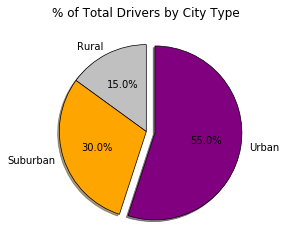

In [126]:
# Calculate Driver Percents
total_drivers = type_group.count()["driver_count"]
total_ride

# Build Pie Charts
colors = ["silver", "orange", "purple"]
explode = [0, 0, 0.1]

plt.pie(total_drivers, startangle = 90, colors = colors, explode = explode, labels = total_drivers.index, 
autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": 0.7, "edgecolor": "black"})

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/Ride3.png")

In [104]:
# Show Figure
plt.show()